## Resnet 50 Alphabet bisindo


In [ ]:
!pip install pyrsgis

In [ ]:
# melakukan proses instalasi split-folders agar mempermudah membagi kategori menjadi beberapa file
!pip install split-folders

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/bisindo.zip

Streaming output truncated to the last 5000 lines.
  inflating: bisindo/P/rotate071.jpg  
  inflating: bisindo/P/rotate072.jpg  
  inflating: bisindo/P/rotate073.jpg  
  inflating: bisindo/P/rotate074.jpg  
  inflating: bisindo/P/rotate075.jpg  
  inflating: bisindo/P/rotate076.jpg  
  inflating: bisindo/P/rotate077.jpg  
  inflating: bisindo/P/rotate078.jpg  
  inflating: bisindo/P/rotate079.jpg  
  inflating: bisindo/P/rotate080.jpg  
  inflating: bisindo/P/rotate081.jpg  
  inflating: bisindo/P/rotate082.jpg  
  inflating: bisindo/P/rotate083.jpg  
  inflating: bisindo/P/rotate084.jpg  
  inflating: bisindo/P/rotate085.jpg  
  inflating: bisindo/P/rotate086.jpg  
  inflating: bisindo/P/rotate087.jpg  
  inflating: bisindo/P/rotate088.jpg  
  inflating: bisindo/P/rotate089.jpg  
  inflating: bisindo/P/rotate090.jpg  
  inflating: bisindo/P/rotate091.jpg  
  inflating: bisindo/P/rotate092.jpg  
  inflating: bisindo/P/rotate093.jpg  
  inflating: bisindo/P/rotate094.jpg  
  inflating: 

In [ ]:
# Import Semua Library yang diperlukan

import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom

In [ ]:
from sklearn.model_selection import train_test_split
from keras.applications.inception_resnet_v2 import InceptionResNetV2, preprocess_input, decode_predictions
from sklearn.model_selection import train_test_split
from tensorflow.keras.preprocessing.image import ImageDataGenerator #Library untuk augmentasi dan generate gambar
from tensorflow.keras.optimizers import RMSprop #Library untuk optimasi data
from google.colab import files #Library untuk inputan gambar dan grafik
from keras.preprocessing import image
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Activation, Dense, Flatten
from tensorflow.keras.layers import Dropout
from tensorflow.keras.optimizers import Adam

In [ ]:
#Import Library
from tensorflow.keras.layers import MaxPooling2D, Conv2D, Dropout, Flatten, Dense, GlobalAveragePooling2D
from tensorflow.keras.models import Sequential
from sklearn.preprocessing import LabelEncoder
from tensorflow.keras.utils import to_categorical
from sklearn.model_selection import train_test_split
from tqdm.notebook import tqdm
from tifffile import imread
import matplotlib.pyplot as plt
from imutils import paths
import numpy as np
import os
import cv2
import tensorflow as tf
import datetime
import zipfile

In [ ]:
# Import Semua Library yang diperlukan

import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.utils import image_dataset_from_directory
from tensorflow.keras.layers.experimental.preprocessing import RandomFlip, RandomRotation, RandomZoom

In [ ]:
!mkdir /content/citra

In [ ]:
!mkdir /content/citra/0Hutan
!mkdir /content/citra/1Kebun
!mkdir /content/citra/2Permukiman
!mkdir /content/citra/3Sawah
!mkdir /content/citra/4Tambang

In [ ]:
# #train move
import shutil
import os

source_dir = '/content/class/Hutan'
target_dir = '/content/citra/0Hutan'
source_dir1 = '/content/class/Kebun'
target_dir1 = '/content/citra/1Kebun'
source_dir2 = '/content/class/Permukiman'
target_dir2 = '/content/citra/2Permukiman'
source_dir3 = '/content/class/Sawah'
target_dir3 = '/content/citra/3Sawah'
source_dir4 = '/content/class/Tambang'
target_dir4 = '/content/citra/4Tambang'

file_names = os.listdir(source_dir)
file_names1 = os.listdir(source_dir1)
file_names2 = os.listdir(source_dir2)
file_names3 = os.listdir(source_dir3)
file_names4 = os.listdir(source_dir4)

for file_name in file_names:
    shutil.move(os.path.join(source_dir, file_name), target_dir)

for file_names1 in file_names1:
    shutil.move(os.path.join(source_dir1, file_names1), target_dir1)

for file_names2 in file_names2:
    shutil.move(os.path.join(source_dir2, file_names2), target_dir2)

for file_names3 in file_names3:
    shutil.move(os.path.join(source_dir3, file_names3), target_dir3)

for file_names4 in file_names4:
    shutil.move(os.path.join(source_dir4, file_names4), target_dir4)

In [ ]:
test0=os.listdir('/content/citra/0Hutan')
test1=os.listdir('/content/citra/1Kebun')
test2=os.listdir('/content/citra/2Permukiman')
test3=os.listdir('/content/citra/3Sawah')
test4=os.listdir('/content/citra/4Tambang')


print("Class 0: ",len(test0))


Class 0:  51


In [ ]:
import os
import numpy as np
import shutil
import pandas as pd


def train_test_split():
    print("########### Train Test Val Script started ###########")

    root_dir = '/content/citra_baru'
    classes_dir = ['A', 'B', 'C', 'D', 'E','F','G','H', 'I', 'J', 'K', 'L','M','N', 'O', 'P', 'Q', 'R','S','T', 'U', 'V', 'W', 'X','Y','Z']

    processed_dir = '/content/bisindo'

    test_ratio = 0.10
    val_ratio = 0.20

    for cls in classes_dir:
        # Creating partitions of the data after shuffeling
        print("$$$$$$$ Class Name " + cls + " $$$$$$$")
        src = processed_dir +"/" + cls  # Folder to copy images from

        allFileNames = os.listdir(src)
        np.random.shuffle(allFileNames)
        train_FileNames, val_FileNames, test_FileNames = np.split(np.array(allFileNames),
                                                                  [int(len(allFileNames) * (1 - (test_ratio + val_ratio))),
                                                                   int(len(allFileNames) * (1 - test_ratio)),
                                                                   ])

        train_FileNames = [src + '/' + name for name in train_FileNames.tolist()]
        val_FileNames = [src + '/' + name for name in val_FileNames.tolist()]
        test_FileNames = [src + '/' + name for name in test_FileNames.tolist()]

        print('Total images: '+ str(len(allFileNames)))
        print('Training: '+ str(len(train_FileNames)))
        print('Validation: '+  str(len(val_FileNames)))
        print('Testing: '+ str(len(test_FileNames)))

        # # Creating Train / Val / Test folders (One time use)
        os.makedirs(root_dir + '/train/' + cls)
        os.makedirs(root_dir + '/val/' + cls)
        os.makedirs(root_dir + '/test/' + cls)

        # Copy-pasting images
        for name in train_FileNames:
            shutil.copy(name, root_dir + '/train/' + cls)

        for name in val_FileNames:
            shutil.copy(name, root_dir + '/val/' + cls)

        for name in test_FileNames:
            shutil.copy(name, root_dir + '/test/' + cls)

    print("########### Train Test Val Script Ended ###########")

train_test_split()

########### Train Test Val Script started ###########
$$$$$$$ Class Name A $$$$$$$
Total images: 489
Training: 342
Validation: 98
Testing: 49
$$$$$$$ Class Name B $$$$$$$
Total images: 490
Training: 343
Validation: 98
Testing: 49
$$$$$$$ Class Name C $$$$$$$
Total images: 480
Training: 336
Validation: 96
Testing: 48
$$$$$$$ Class Name D $$$$$$$
Total images: 486
Training: 340
Validation: 97
Testing: 49
$$$$$$$ Class Name E $$$$$$$
Total images: 492
Training: 344
Validation: 98
Testing: 50
$$$$$$$ Class Name F $$$$$$$
Total images: 498
Training: 348
Validation: 100
Testing: 50
$$$$$$$ Class Name G $$$$$$$
Total images: 501
Training: 350
Validation: 100
Testing: 51
$$$$$$$ Class Name H $$$$$$$
Total images: 486
Training: 340
Validation: 97
Testing: 49
$$$$$$$ Class Name I $$$$$$$
Total images: 501
Training: 350
Validation: 100
Testing: 51
$$$$$$$ Class Name J $$$$$$$
Total images: 501
Training: 350
Validation: 100
Testing: 51
$$$$$$$ Class Name K $$$$$$$
Total images: 486
Training: 340
V

In [ ]:
train_dir =  '/content/citra_baru/train'   #Direktori Train
validation_dir = '/content/citra_baru/val'  #Direktori Vaildation
test_dir =  '/content/citra_baru/test'     #Direktori untuk testing

In [ ]:
BATCH_SIZE = 32
IMG_HEIGHT = 224
IMG_WIDTH = 224
EPOCHS = 10

ValueError: num must be an integer with 1 <= num <= 20, not 21

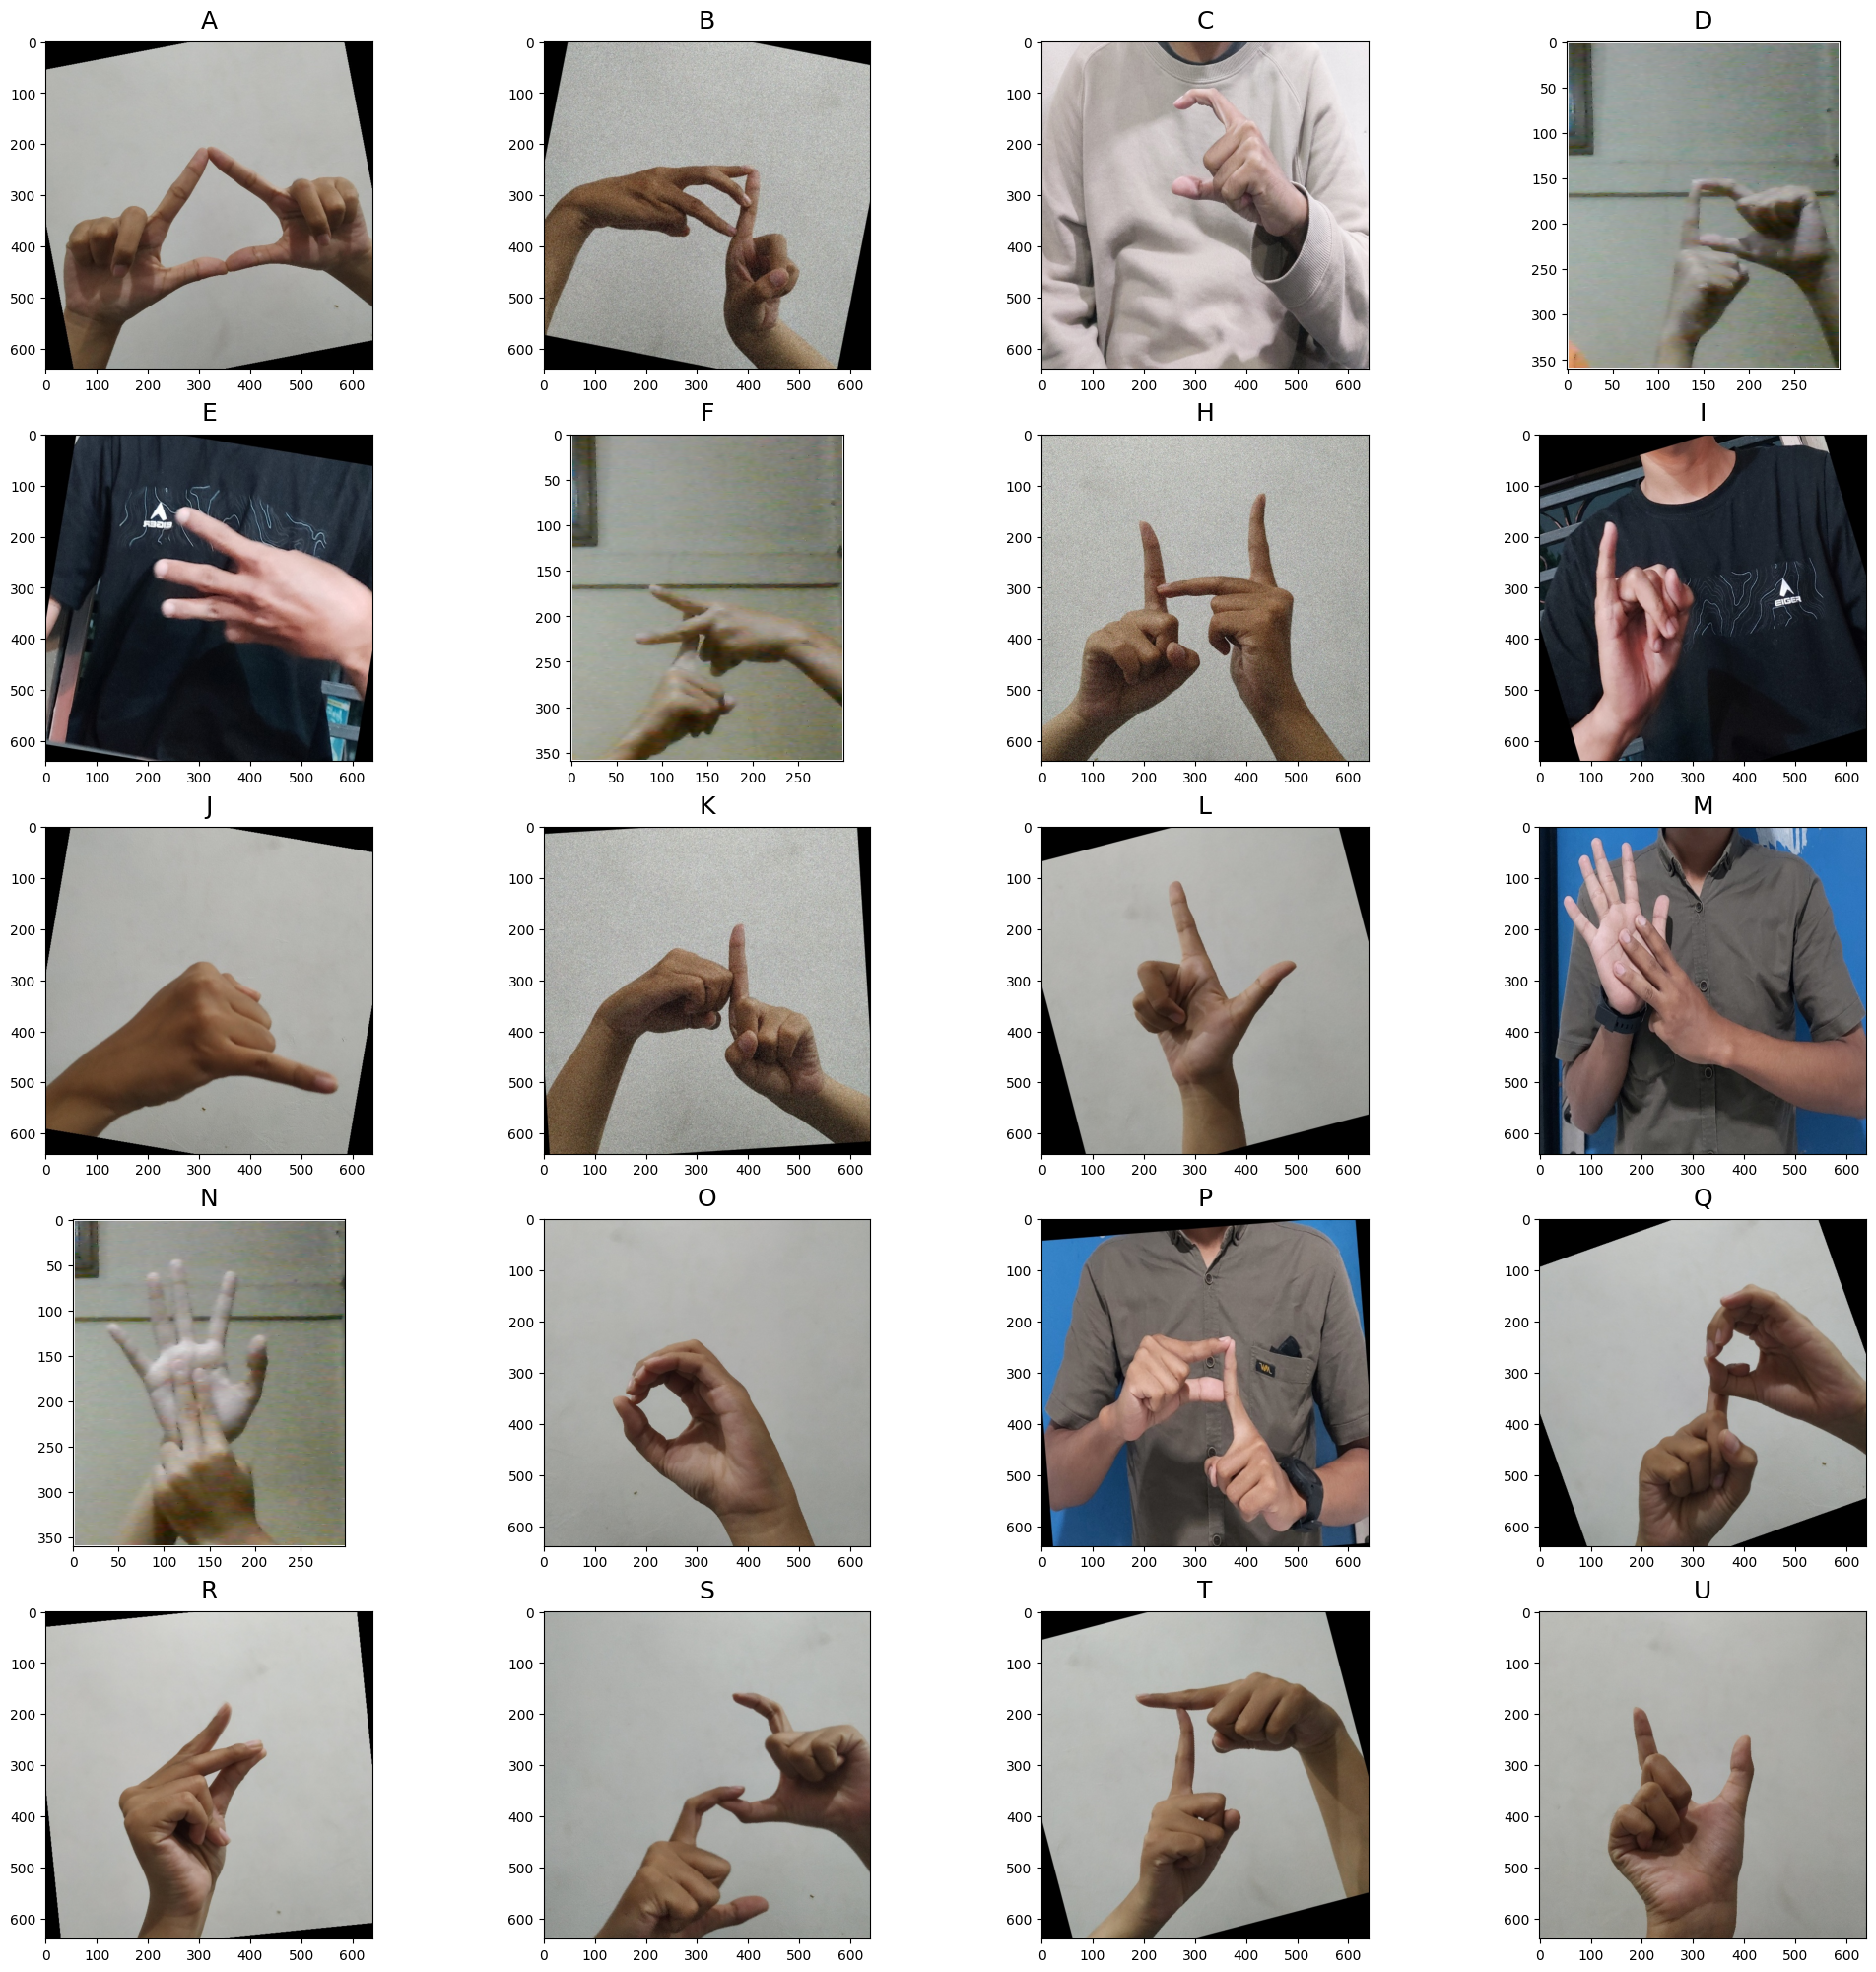

In [ ]:
#Melihat distribusi gambar dan labeling

import random
train_folder = train_dir #Membuat variabel baru dengan nama train_folder
images = []

for food_folder in sorted(os.listdir(train_folder)): # Perulangan untuk disetiap food folder yang didefinisikan sebagai train folder
    food_items = os.listdir(train_folder + '/' + food_folder) # Masukkan food items
    food_selected = np.random.choice(food_items)
    images.append(os.path.join(train_folder,food_folder,food_selected))

# Melakukan Plotting dan visualisasi gambar

fig=plt.figure(1, figsize=(25, 25))

for subplot,image_ in enumerate(images):
    category=image_.split('/')[-2]
    imgs = plt.imread(image_)
    a,b,c=imgs.shape
    fig=plt.subplot(5, 4, subplot+1)
    fig.set_title(category, pad = 10,size=18)
    plt.imshow(imgs)

plt.tight_layout()

In [ ]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from keras.applications.efficientnet import preprocess_input
datagen = ImageDataGenerator(rescale=1./255,
                             rotation_range=20,
                             horizontal_flip=True,
                             vertical_flip=True,
                             shear_range = 0.2,
                             fill_mode = 'nearest',
                             preprocessing_function=preprocess_input)

val_datagen = ImageDataGenerator(rescale=1./255,
                                 rotation_range=20,
                                 horizontal_flip=True,
                                 vertical_flip=True,
                                 shear_range = 0.2,
                                 fill_mode = 'nearest',
                                 preprocessing_function=preprocess_input)

test_datagen= ImageDataGenerator(rescale=1./255,
                                 rotation_range=20,
                                 horizontal_flip=True,
                                 shear_range = 0.2,
                                 fill_mode = 'nearest',
                                 preprocessing_function=preprocess_input)

train_data = datagen.flow_from_directory(train_dir,
                                         target_size=(IMG_HEIGHT,IMG_WIDTH),
                                         batch_size=BATCH_SIZE,
                                         shuffle=True,
                                         class_mode = 'categorical')

val_data = val_datagen.flow_from_directory(validation_dir,
                                          target_size=(IMG_HEIGHT,IMG_WIDTH),
                                          batch_size=BATCH_SIZE,
                                          shuffle=False,
                                          class_mode = 'categorical')

test_data = test_datagen.flow_from_directory(test_dir,
                                             target_size=(IMG_HEIGHT,IMG_WIDTH),
                                             batch_size=BATCH_SIZE,
                                             shuffle=False,
                                             class_mode = 'categorical')

Found 8946 images belonging to 26 classes.
Found 2559 images belonging to 26 classes.
Found 1291 images belonging to 26 classes.


In [ ]:
class_names = train_data.class_indices
print(class_names)

{'A': 0, 'B': 1, 'C': 2, 'D': 3, 'E': 4, 'F': 5, 'G': 6, 'H': 7, 'I': 8, 'J': 9, 'K': 10, 'L': 11, 'M': 12, 'N': 13, 'O': 14, 'P': 15, 'Q': 16, 'R': 17, 'S': 18, 'T': 19, 'U': 20, 'V': 21, 'W': 22, 'X': 23, 'Y': 24, 'Z': 25}


In [ ]:
from keras.applications.resnet50 import ResNet50, preprocess_input, decode_predictions

In [ ]:
from keras.models import Model
from keras.layers import Dense, GlobalAveragePooling2D, Dropout, Flatten, BatchNormalization
from tensorflow.keras.models import Sequential

model_ef = Sequential([
                       ResNet50(input_shape=(IMG_HEIGHT, IMG_WIDTH, 3), weights="imagenet", include_top=False) # Masukkan transfer learning dan masukkan inputshape sesuai dengan ukuran gambar serta bobot ImageNet
], name="base_model")

94765736/94765736 [==============================] - 5s 0us/step


In [ ]:
model_ef_custom = Sequential([ # Gunakan model sequential yang telah diimport di tensorflow
        model_ef,         # Masukkan model dasar tadi
        BatchNormalization(),
        GlobalAveragePooling2D(),
        Flatten(),
        Dense(128, activation = 'relu'),   # Fully connected layer Dense 128 filter layout dengan aktivasi relu
        Dropout(0.5),                      # Gunakan dropout sebanyak 0.5 untuk mitigasi overfitting
        Dense(26, activation="softmax")    # Masukkan sesuai class yang digunakan disini kami memiliki 5 class
        ], name = "custom_ef_model")


In [ ]:
model_ef_custom.summary()

Model: "custom_ef_model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 base_model (Sequential)     (None, 8, 8, 1536)        54336736  
                                                                 
 batch_normalization_406 (Ba  (None, 8, 8, 1536)       6144      
 tchNormalization)                                               
                                                                 
 global_average_pooling2d (G  (None, 1536)             0         
 lobalAveragePooling2D)                                          
                                                                 
 flatten (Flatten)           (None, 1536)              0         
                                                                 
 dense (Dense)               (None, 128)               196736    
                                                                 
 dropout (Dropout)           (None, 128)           

In [ ]:
# Melakukan Compiling model menggunakan optimizer, Loss dan metrics yang sesuai
adam = tf.keras.optimizers.Adam(learning_rate = 0.0001)
model_ef_custom.compile(optimizer= adam,
                              loss= 'categorical_crossentropy',
                              metrics=['accuracy']
                              )

In [ ]:
import time
start = time.time()
history = model_ef_custom.fit(     # Training data
    train_data,                       # Masukkan data yang akan di train yaitu train dataset
    validation_data=val_data,
    steps_per_epoch=train_data.n/BATCH_SIZE,
    validation_steps=test_data.n/BATCH_SIZE,  # Masukkan data yang akan di validasi yaitu validation dataset
    epochs= EPOCHS,                      # Masukkan epoch sebanyak 30 kali
    verbose=1                            # Verbose
)
end = time.time()
print (end-start)

Epoch 1/10
279/279 [==============================] - 272s 810ms/step - loss: 0.9998 - accuracy: 0.7639 - val_loss: 3.5455 - val_accuracy: 0.0747
Epoch 2/10
279/279 [==============================] - 225s 805ms/step - loss: 0.1845 - accuracy: 0.9589 - val_loss: 3.3633 - val_accuracy: 0.0564
Epoch 3/10
279/279 [==============================] - 227s 812ms/step - loss: 0.1230 - accuracy: 0.9700 - val_loss: 0.6251 - val_accuracy: 0.8338
Epoch 4/10
279/279 [==============================] - 228s 815ms/step - loss: 0.0952 - accuracy: 0.9770 - val_loss: 0.0678 - val_accuracy: 0.9809
Epoch 5/10
279/279 [==============================] - 224s 800ms/step - loss: 0.0829 - accuracy: 0.9789 - val_loss: 0.0821 - val_accuracy: 0.9787
Epoch 6/10
279/279 [==============================] - 205s 732ms/step - loss: 0.0699 - accuracy: 0.9825 - val_loss: 0.0578 - val_accuracy: 0.9855
Epoch 7/10
279/279 [==============================] - 225s 802ms/step - loss: 0.0559 - accuracy: 0.9868 - val_loss: 0.0389 -

In [ ]:
def display_training_curves(training, validation, title, subplot):

    if subplot%10==1: # set up the subplots on the first call
        plt.subplots(figsize=(10,10), facecolor='#F0F0F0')
        plt.tight_layout()
    ax = plt.subplot(subplot)
    ax.set_facecolor('#F8F8F8')
    ax.plot(training)
    ax.plot(validation)
    ax.set_title('model '+ title)
    ax.set_ylabel(title)
    #ax.set_ylim(0.28,1.05)
    ax.set_xlabel('epoch')
    ax.legend(['train', 'valid.'])

<ipython-input-18-e21ee6919872>:6: MatplotlibDeprecationWarning: Auto-removal of overlapping axes is deprecated since 3.6 and will be removed two minor releases later; explicitly call ax.remove() as needed.
  ax = plt.subplot(subplot)


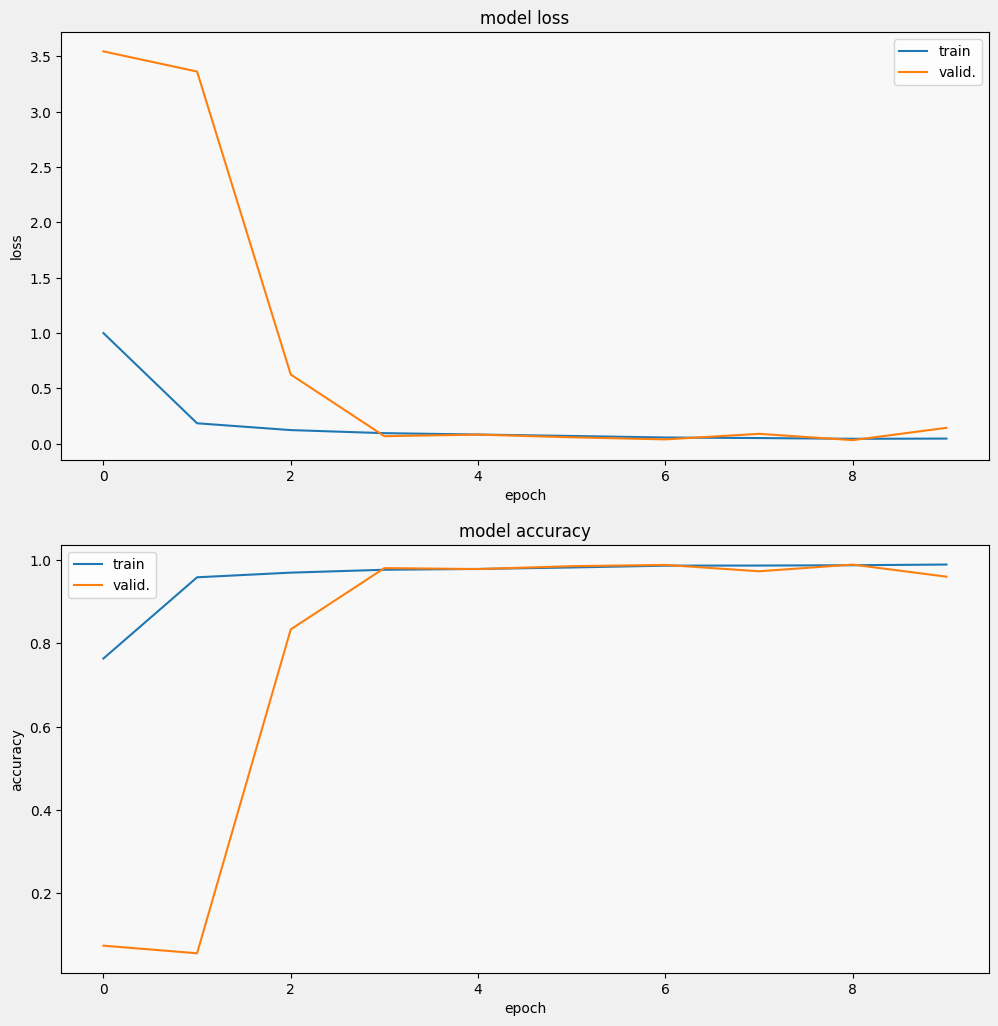

In [ ]:
#display
display_training_curves(
    history.history['loss'],
    history.history['val_loss'],
    'loss', 211)
display_training_curves(
    history.history['accuracy'],
    history.history['val_accuracy'],
    'accuracy', 212)

41/41 [==============================] - 39s 936ms/step
Confusion Matrix
Confusion matrix, without normalization
Classification Report
              precision    recall  f1-score   support

           A       1.00      0.94      0.97        49
           B       1.00      0.96      0.98        49
           C       1.00      0.77      0.87        48
           D       0.92      1.00      0.96        49
           E       1.00      0.98      0.99        50
           F       0.98      1.00      0.99        50
           G       1.00      0.92      0.96        51
           H       1.00      1.00      1.00        49
           I       1.00      0.96      0.98        51
           J       1.00      1.00      1.00        51
           K       1.00      0.94      0.97        49
           L       0.77      1.00      0.87        50
           M       0.92      0.96      0.94        50
           N       0.94      0.92      0.93        49
           O       1.00      0.96      0.98        50


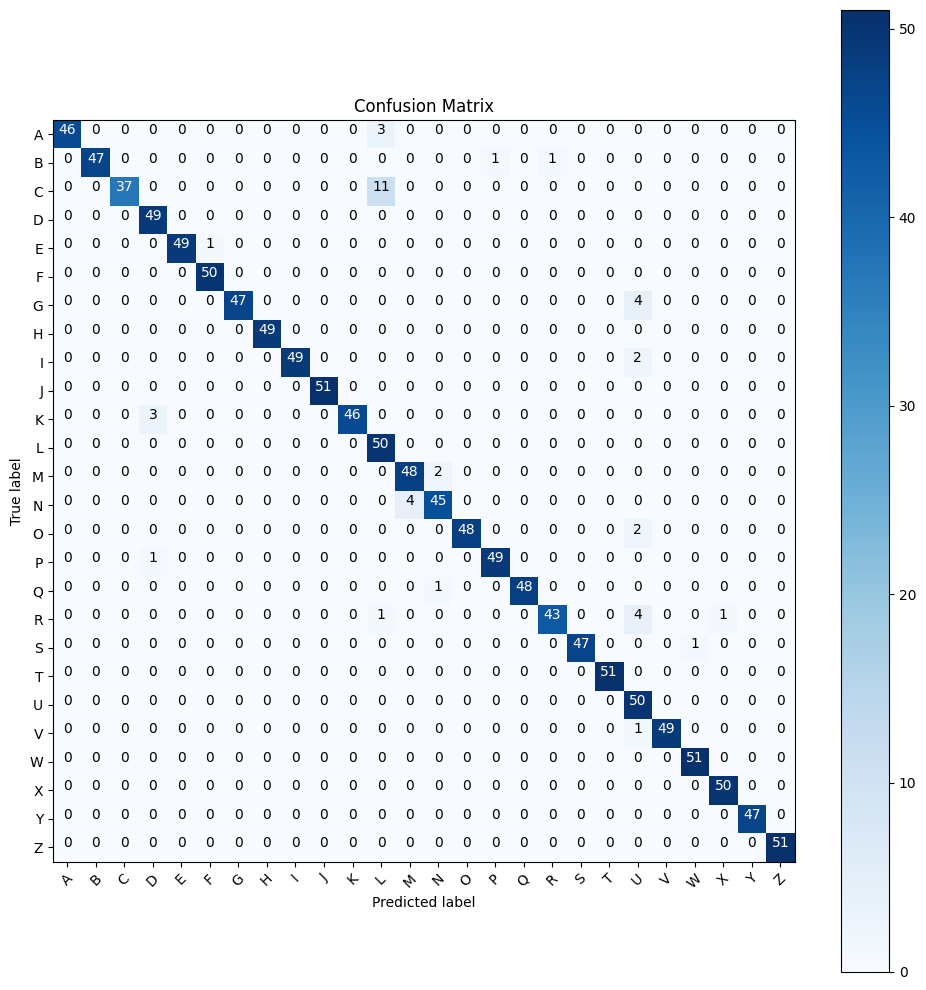

In [ ]:
def plot_confusion_matrix(cm, classes, normalize=True, title='Confusion matrix', cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    plt.figure(figsize=(10,10))
    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)
    #if normalize:
        #cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        #cm = np.around(cm, decimals=2)
        #cm[np.isnan(cm)] = 0.0
        #print("Normalized confusion matrix")
    #else:
    print('Confusion matrix, without normalization')
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
      plt.text(j, i, cm[i, j],
      horizontalalignment="center",
      color="white" if cm[i, j] > thresh else "black")
      plt.tight_layout()
      plt.ylabel('True label')
      plt.xlabel('Predicted label')
#Print the Target names
from sklearn.metrics import classification_report, confusion_matrix
import itertools
#shuffle=False
target_names = []
for key in train_data.class_indices:
    target_names.append(key)
# print(target_names)
#Confution Matrix
Y_pred = model_ef_custom.predict(test_data)
y_pred = np.argmax(Y_pred, axis=1)
print('Confusion Matrix')
cm = confusion_matrix(test_data.classes, y_pred)
plot_confusion_matrix(cm, target_names, title='Confusion Matrix')
#Print Classification Report
print('Classification Report')
print(classification_report(test_data.classes, y_pred, target_names=target_names))

In [ ]:
model_ef_custom.save("bisindo_resnet50.h5")

/usr/local/lib/python3.10/dist-packages/keras/src/engine/training.py:3103: UserWarning: You are saving your model as an HDF5 file via `model.save()`. This file format is considered legacy. We recommend using instead the native Keras format, e.g. `model.save('my_model.keras')`.
  saving_api.save_model(


In [ ]:
loaded_model = tf.keras.models.load_model('bisindo_resnet50.h5')

In [ ]:
from tensorflow.keras.preprocessing import image
from tensorflow.keras import models
from tensorflow.keras.models import load_model
from tensorflow.keras import models
from PIL import Image
from skimage.io import imread
import cv2



model = loaded_model
category={
    0: ['a','A'], 1: ['b','B'], 2: ['c','C'],
    3: ['d','D'], 4: ['e','E'], 5: ['f','F'], 6: ['g','G'], 7: ['h','H'],
    8: ['i','U'], 9: ['j','J'], 10: ['k','K'], 11: ['l','L'], 12: ['m','M'],
    13: ['n','N'], 14: ['o','O'], 15: ['p','P'], 16: ['q','Q'], 17: ['r','R'],
    18: ['s','S'], 19: ['t','T'], 20: ['u','U'], 21: ['v','V'], 22: ['w','W'],
    23: ['x','X'], 24: ['y','Y'], 25: ['z','Z']
}

# Fungsi untuk memprediksi gambar ( hanya 1 file )
def predict_image(filename,model):
    img_ = image.load_img(filename, target_size=(224, 224))
    img_array = image.img_to_array(img_)
    img_processed = np.expand_dims(img_array, axis=0)
    img_processed /= 255.

    prediction = model.predict(img_processed)

    index = np.argmax(prediction)

    plt.title("Prediksi Gambar ini adalah - {}  ".format(category[index][1]))
    plt.imshow(img_)


# Fungsi untuk memprediksi gambar ( untuk 1 folder/direktori )
def predict_dir(filedir,model):
    cols=5
    pos=0
    images=[]
    total_images=len(os.listdir(filedir))
    rows=total_images//cols + 1

    true=filedir.split('/')[-1]

    fig=plt.figure(1, figsize=(25, 25))

    for i in sorted(os.listdir(filedir)):
        images.append(os.path.join(filedir,i))

    for subplot,imggg in enumerate(images):
        img_ = image.load_img(imggg, target_size=(224, 224))
        img_array = image.img_to_array(img_)

        img_processed = np.expand_dims(img_array, axis=0)

        img_processed /= 255.
        prediction = model.predict(img_processed)
        index = np.argmax(prediction)

        pred=category.get(index)[0]
        if pred==true:
            pos+=1

        fig=plt.subplot(rows, cols, subplot+1)
        fig.set_title(category.get(index)[1], pad = 10,size=18)
        plt.imshow(img_)

    acc=pos/total_images
    print("Accuracy of Test : {:.2f} ({pos}/{total})".format(acc,pos=pos,total=total_images))
    plt.tight_layout()

1/1 [==============================] - 0s 41ms/step


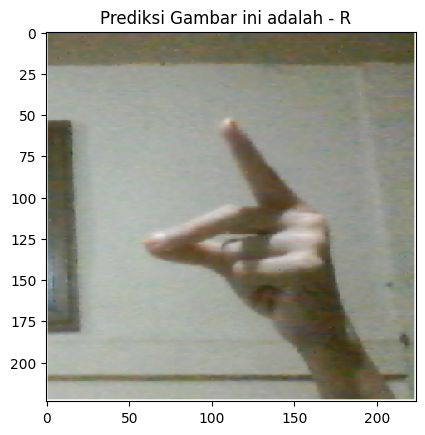

In [ ]:
predict_image('/content/49.png',model)

1/1 [==============================] - 0s 39ms/step
Accuracy of Test : 0.00 (0/251)


<ipython-input-58-9eed1975fe48>:67: UserWarning: Tight layout not applied. tight_layout cannot make axes height small enough to accommodate all axes decorations.
  plt.tight_layout()


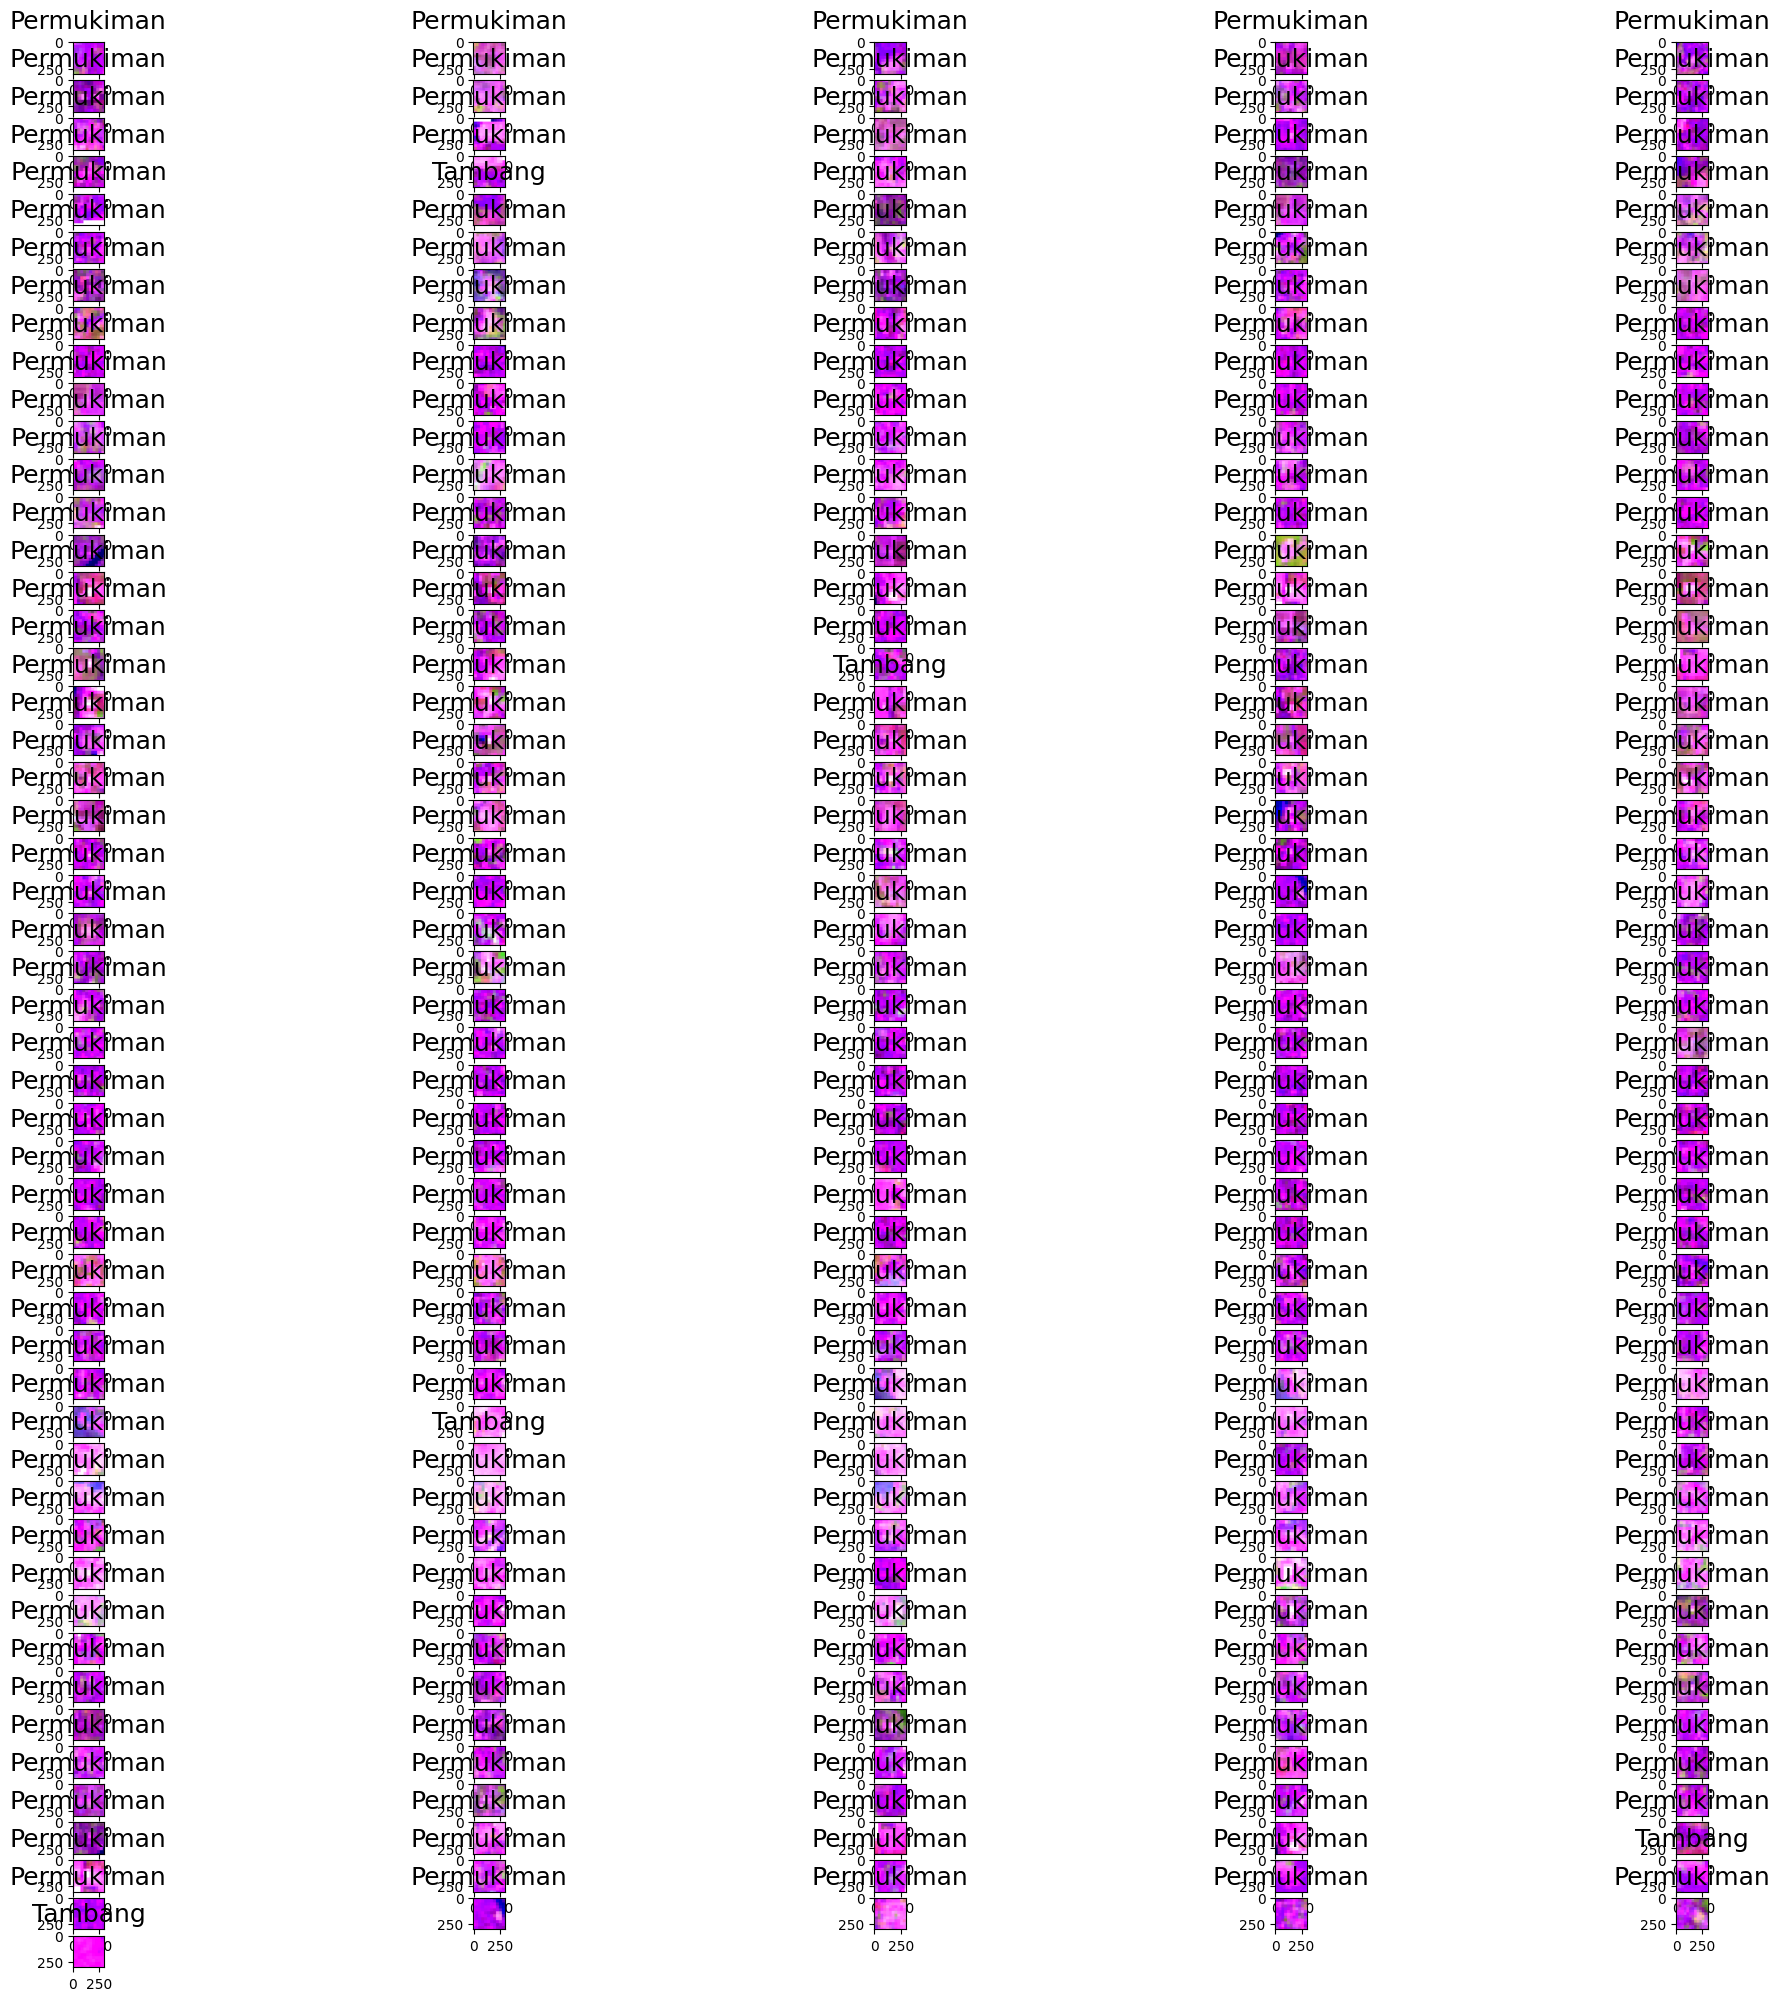

In [ ]:

predict_dir('/content/citra/2Permukiman/',model)

In [ ]:
!pip install numba

from numba import cuda
device = cuda.get_current_device()
device.reset()

In [ ]:
# Install required libraries
!pip install pyrsgis rasterio

     ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 21.3/21.3 MB 67.7 MB/s eta 0:00:00


In [ ]:
from pyrsgis import raster, ml

In [ ]:
# Load libraries
import gc
import rasterio
import numpy as np
from time import time
from tqdm import tqdm
import multiprocessing
import tensorflow as tf
from pyrsgis import raster, ml
import matplotlib.pyplot as plt
from collections import Counter
from rasterio.plot import reshape_as_image
from sklearn.feature_extraction import image
from tensorflow.keras import mixed_precision
from tensorflow.keras.models import load_model

In [ ]:
from tensorflow.keras.utils import img_to_array

In [ ]:
# Load model
model = load_model("/content/drive/MyDrive/Aqil Skripsi/Skripsi/coba24072023.h5")

In [ ]:
!pip install rasterio

In [ ]:
from PIL import Image

# Load the TIFF image
image_path = '/content/Kota_Gorontalo_1.tif'
image = Image.open(image_path)

# Resize the image to 300x300 pixels
resized_image = image.resize((300, 300))

# Save the resized image
output_path = '/content/Kota_Gorontalo_resized.tif'
resized_image.save(output_path)

print("Image resized and saved successfully.")


Image resized and saved successfully.


In [ ]:
import numpy as np

# Load a new multispectral image
ds, imagas = raster.read('/content/Kota_Gorontalo_resized.tif')

# Reshape new_features to (90000, 300, 300, 4)
new_features = ml.array_to_chips(imagas, y_size=300, x_size=300)

# Resize and expand dimensions to (90000, 300, 300, 3)
resized_features = np.zeros((new_features.shape[0], 300, 300, 3))
for i in range(new_features.shape[0]):
    for j in range(new_features.shape[1]):
        resized_features[i, :, :, j] = np.resize(new_features[i, j], (300, 300))

# Update the shape of new_features
new_features = resized_features

print('Shape of the images:', imagas.shape)
print('Shape of the new features:', new_features.shape)


In [ ]:
  # Load multispectral image
  ds, images = raster.read("/content/drive/MyDrive/Aqil Skripsi/Skripsi/Sulbar/Bar 2013.tiff")

  # Chucking images area
  new_feature = ml.array_to_chips(images, y_size = 75, x_size = 75)

  # Check dimension
  print(f"Image Shape Original: {images.shape}")
  print(f"Image Chuck Size    : {new_feature.shape}")

  new_feature_3_channels = new_feature[:, :, :, :3]

# Cek dimensi new_feature_3_channels
print(f"Image Chuck Size (3 Channels): {new_feature_3_channels.shape}")

Image Shape Original: (4, 484, 500)
Image Chuck Size    : (242000, 75, 75, 4)
Image Chuck Size (3 Channels): (242000, 75, 75, 3)


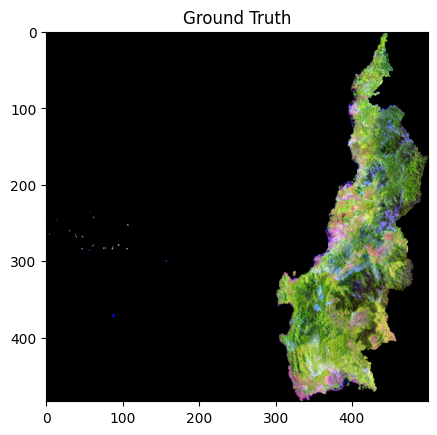

In [ ]:
# Overview Ground Truth of Input image
with rasterio.open("/content/drive/MyDrive/Aqil Skripsi/Skripsi/Sulbar/Bar 2013.tiff") as src:
    rgba_image = src.read()
    rgb_image  = rgba_image[:3, :, :]

plt.title("Ground Truth")
plt.imshow(reshape_as_image(rgb_image));

In [ ]:
# Create function to clear memory GPU after inference in sequence time
def reset_gpu_memory():
    tf.keras.backend.clear_session()

In [ ]:
reset_gpu_memory()

7563/7563 [==============================] - 150s 18ms/step


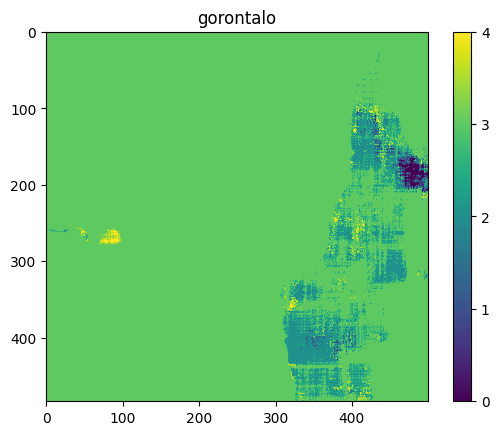

In [ ]:
# Predict new data and export the probability raster
newPredicted = model.predict(new_feature_3_channels/255)
Predicted = np.argmax(newPredicted, axis=-1)
prediction = np.reshape(Predicted, (ds.RasterYSize, ds.RasterXSize))

# Plotting
fig, ax = plt.subplots()
h = ax.imshow(prediction, vmin = 0, vmax = 4)
fig.colorbar(h, ticks = np.linspace(0,4,5))
ax.set_title(f'gorontalo')
fig.show()

Image Shape Original: (4, 155, 500)
Image Chuck Size    : (12, 75, 75, 3)
1/1 [==============================] - 0s 43ms/step


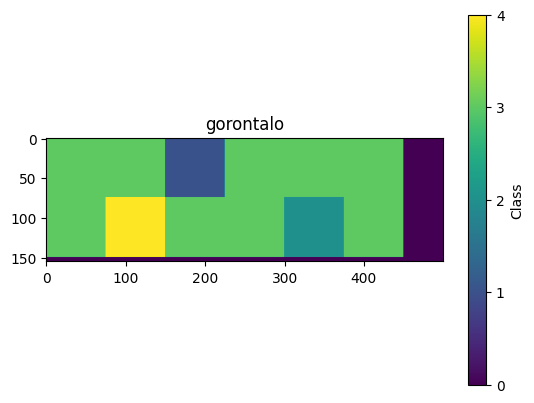

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from osgeo import gdal
from rasterio.windows import Window

# Load multispectral image
ds = gdal.Open("/content/drive/MyDrive/Aqil Skripsi/Skripsi/Go/Go 2013.tif")
images = ds.ReadAsArray()

# Define class labels
class_labels = {'0Hutan': 0, '1Kebun': 1, '2Permukiman': 2, '3Sawah': 3, '4Tambang': 4}

# Chunking images into smaller windows
window_size = 75
stride = 75
height, width = images.shape[1], images.shape[2]

windows = []
for y in range(0, height - window_size + 1, stride):
    for x in range(0, width - window_size + 1, stride):
        window = Window(x, y, window_size, window_size)
        windows.append(window)

new_feature_3_channels = []
for window in windows:
    chip = images[:, window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width]
    chip = np.transpose(chip, (1, 2, 0))  # Change dimension order (channels, height, width) to (height, width, channels)
    new_feature_3_channels.append(chip[:, :, :3])  # Take the first 3 channels

new_feature_3_channels = np.array(new_feature_3_channels)

# Check dimension
print(f"Image Shape Original: {images.shape}")
print(f"Image Chuck Size    : {new_feature_3_channels.shape}")

# Load your model here
# Example: model = load_model("path_to_your_model")

# Predict new data and export the probability raster
newPredicted = model.predict(new_feature_3_channels / 255)
Predicted = np.argmax(newPredicted, axis=-1)
prediction = np.zeros((height, width), dtype=np.uint8)

# Reconstruct the prediction raster
window_idx = 0
for y in range(0, height - window_size + 1, stride):
    for x in range(0, width - window_size + 1, stride):
        window = Window(x, y, window_size, window_size)
        prediction[window.row_off:window.row_off + window.height, window.col_off:window.col_off + window.width] = Predicted[window_idx]
        window_idx += 1

# Plotting
fig, ax = plt.subplots()
h = ax.imshow(prediction, cmap='viridis', vmin=0, vmax=4)
fig.colorbar(h, ticks=np.linspace(0, 4, 5), label='Class')
ax.set_title(f'gorontalo')
plt.show()


In [ ]:
# Count the number of pixels
unique, counts = np.unique(prediction, return_counts=True)
dict(zip(unique, counts))

{0: 77500}

In [ ]:
# Load a new multispectral image
ds, imagas = raster.read('/content/Kota_Gorontalo_resized.tif')
new_features = ml.array_to_chips(imagas)

print('Shape of the images', imagas.shape)
print('Shape of the new features', new_features.shape)

Shape of the images (4, 300, 300)
Shape of the new features (90000, 5, 5, 4)


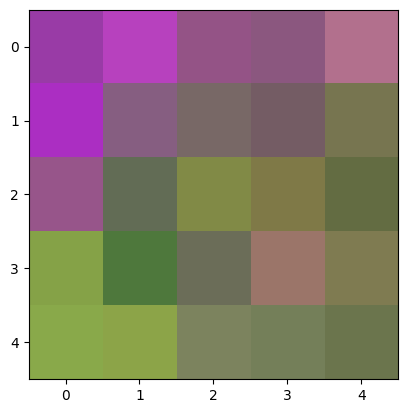

In [ ]:
plt.imshow(new_features[8000])

In [ ]:
# Predict new data and export the probability raster
newPredicted = loaded_model.predict(new_features/255)
Predicted = np.argmax(newPredicted, axis=-1)
prediction = np.reshape(Predicted, (ds.RasterYSize, ds.RasterXSize))

# Plotting
fig, ax = plt.subplots()
h = ax.imshow(prediction, vmin = 0, vmax = 4)
fig.colorbar(h, ticks = np.linspace(0,4,5))
ax.set_title(f'DAS Bengkulu Tahun 2000')
fig.show()

ValueError: ignored